In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv("data_with_mean&max.csv",sep=",")
data.head()

,race,age,engnat,gender,hand,source,country,E,N,A,C,O,moyenne,maximum,personality_type
0,3,53,1,1,1,1,US,3.2,1.9,3.2,3.1,3.1,2.90,3.2,E
1,13,46,1,2,1,1,US,2.8,2.9,3.1,2.8,2.6,2.84,3.1,A
2,1,14,2,2,1,1,PK,2.9,4.6,3.8,3.3,4.1,3.74,4.6,N
3,3,19,2,2,1,1,RO,3.6,4.3,3.7,3.4,3.7,3.74,4.3,N
4,11,25,2,2,1,2,US,2.6,3.2,4.0,2.6,2.2,2.92,4.0,A


<div style="color: darkred; font-size: large">Nous allons introduire le projet grâce à plusieurs graphiques.</div>

Tout d'abord, nous allons voir le nombre de participant par pays. 

<AxesSubplot:>

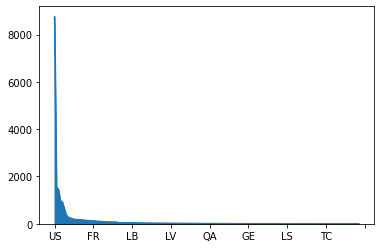

In [4]:
data['country'].value_counts().plot(kind='area')

<AxesSubplot:ylabel='country'>

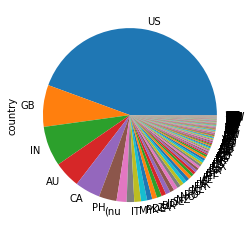

In [15]:
data['country'].value_counts().plot(kind='pie')

Nous allons voir le pourcentage de femme et d'homme dans le monde.

<AxesSubplot:ylabel='gender'>

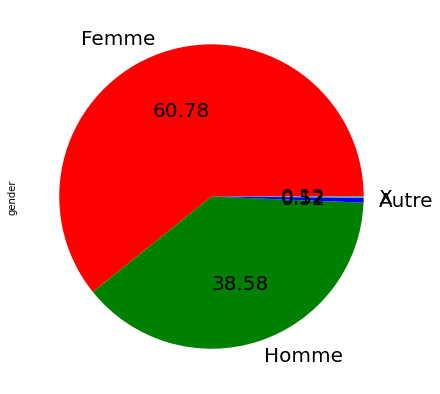

In [6]:
data['gender'].value_counts().plot(kind='pie',figsize=(7,7),labels=['Femme', 'Homme', 'Autre', 'X'], colors=['r', 'g', 'b', 'c'],autopct='%.2f', fontsize=20)

Nous allons voir la répartition des races dans le monde.

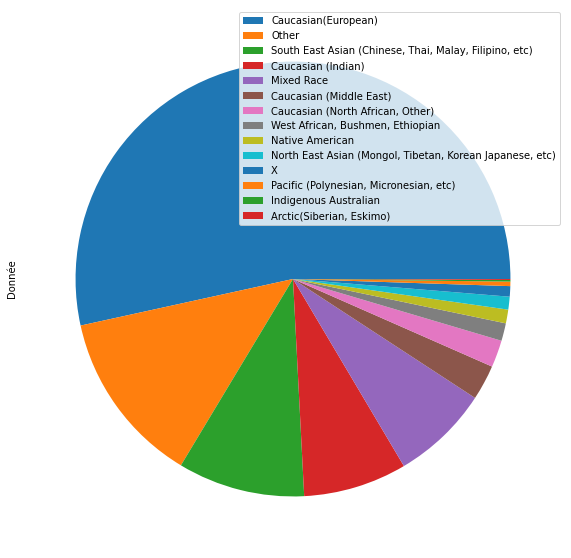

In [7]:
Pie = pd.DataFrame({'Donnée': [10537,2553,1861,1518,1434,515,397,259,201,188,153,65,24,14]},

                  index=['Caucasian(European)','Other','South East Asian (Chinese, Thai, Malay, Filipino, etc)','Caucasian (Indian)','Mixed Race','Caucasian (Middle East)','Caucasian (North African, Other)','West African, Bushmen, Ethiopian','Native American','North East Asian (Mongol, Tibetan, Korean Japanese, etc)','X','Pacific (Polynesian, Micronesian, etc)','Indigenous Australian','Arctic(Siberian, Eskimo)'])

plot = Pie.plot.pie(y='Donnée', figsize=(10, 10),labeldistance=None)
plot.legend(['Caucasian(European)','Other','South East Asian (Chinese, Thai, Malay, Filipino, etc)','Caucasian (Indian)','Mixed Race','Caucasian (Middle East)','Caucasian (North African, Other)','West African, Bushmen, Ethiopian','Native American','North East Asian (Mongol, Tibetan, Korean Japanese, etc)','X','Pacific (Polynesian, Micronesian, etc)','Indigenous Australian','Arctic(Siberian, Eskimo)'], loc=0, fontsize=10)

<div style="font-size: medium">Moyenne d'age des personnes qui ont effectué le test dans le monde :</div>

Ayant des données faussées, nous prenons les données où l'âge est inférieur ou égale à 110ans.

In [8]:
dmoyage = data[data["age"] <= 110]
dmoyage[['age']].mean(axis=0)

age    26.263801
dtype: float64

<div style="font-size: medium">Et aux Etats-Unis :</div>

In [9]:
ET = data[data["country"] == "US"]
ET[ET["age"] <= 110][['age']].mean(axis=0)

age    26.913765
dtype: float64

Graphique de l'âge dans le monde

<AxesSubplot:xlabel='age', ylabel='Density'>

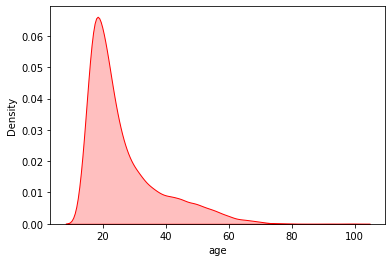

In [10]:
sns.kdeplot(dmoyage['age'], shade=True, color="r")

Nous allons voir la répartition des personnes qui parlent l'anglais de naissance.

<AxesSubplot:ylabel='engnat'>

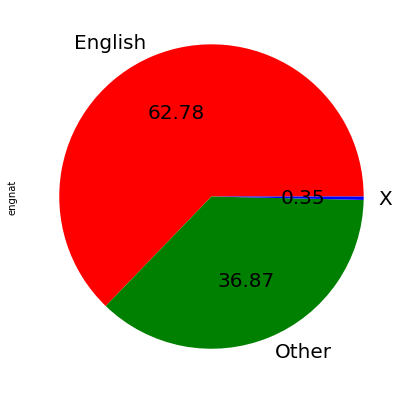

In [11]:
data['engnat'].value_counts().plot(kind='pie',figsize=(7,7),labels=['English', 'Other', 'X'], colors=['r', 'g', 'b'],autopct='%.2f', fontsize=20)

<AxesSubplot:title={'center':'Homme'}, ylabel='engnat'>

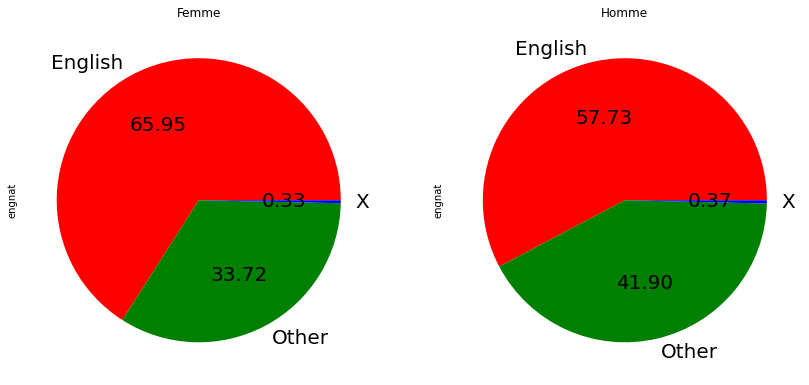

In [12]:
warnings.filterwarnings("ignore")
Femme = data[data["gender"] == 2]
Homme = data[data["gender"] == 1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

Femme['engnat'].value_counts().plot(ax=axes[0], title = 'Femme', kind='pie',labels=['English', 'Other', 'X'], colors=['r', 'g', 'b'],autopct='%.2f', fontsize=20)
Homme['engnat'].value_counts().plot(ax=axes[1], title = 'Homme', kind='pie',labels=['English', 'Other', 'X'], colors=['r', 'g', 'b'],autopct='%.2f', fontsize=20)